In [2]:
import pandas as pd

df = pd.read_excel("../data_clean/Superstore_Cleaned.xlsx", sheet_name="Master")
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Year"] = df["Order Date"].dt.year
df["Year-Month"] = df["Order Date"].dt.to_period("M").astype(str)
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Year,Month,Year-Month,Ship Days,Profit Margin %,Profit Flag
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017-11,3,NaN,N/A (no Profit column)
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017-11,3,NaN,N/A (no Profit column)
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017-06,4,NaN,N/A (no Profit column)
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016-10,7,NaN,N/A (no Profit column)
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016-10,7,NaN,N/A (no Profit column)


In [3]:
monthly = df.groupby("Year-Month", as_index=False)["Sales"].sum().sort_values("Year-Month")
monthly.tail()


,Year-Month,Sales
43,2018-08,62837.8480
44,2018-09,86152.8880
45,2018-10,77448.1312
46,2018-11,117938.1550
47,2018-12,83030.3888


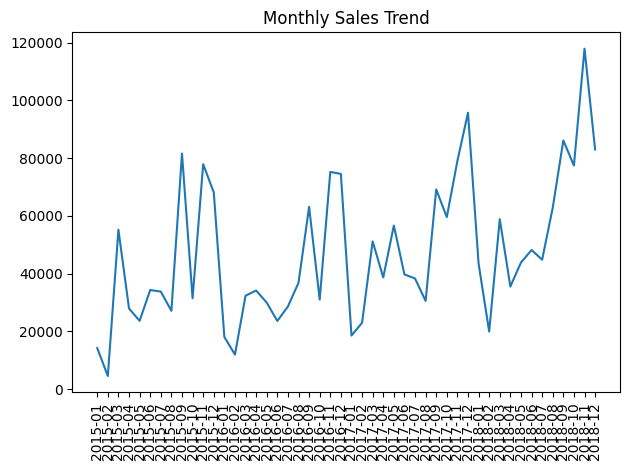

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly["Year-Month"], monthly["Sales"])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


In [5]:
subcat = df.groupby("Sub-Category", as_index=False)["Sales"].sum().sort_values("Sales", ascending=False)
subcat.head(10)


,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


In [6]:
region = df.groupby("Region", as_index=False)["Sales"].sum().sort_values("Sales", ascending=False)
segment = df.groupby("Segment", as_index=False)["Sales"].sum().sort_values("Sales", ascending=False)
region, segment


(    Region        Sales
 3     West  710219.6845
 1     East  669518.7260
 0  Central  492646.9132
 2    South  389151.4590,
        Segment         Sales
 0     Consumer  1.148061e+06
 1    Corporate  6.884941e+05
 2  Home Office  4.249822e+05)

In [7]:
ship = df.groupby("Ship Mode", as_index=False).agg(
    Sales=("Sales","sum"),
    AvgShipDays=("Ship Days","mean")
).sort_values("Sales", ascending=False)
ship


,Ship Mode,Sales,AvgShipDays
3,Standard Class,1.340831e+06,5.008363
2,Second Class,4.499142e+05,3.249211
0,First Class,3.455723e+05,2.179214
1,Same Day,1.252190e+05,0.044610
